In [5]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-13 11:13:27,447: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
# IBMQ.save_account('')

configrc.store_credentials:WARNING:2022-12-13 11:12:19,998: Credentials already present. Set overwrite=True to overwrite.


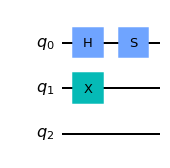

In [27]:
qc = QuantumCircuit(3)
qc.h(0) # ROTATES 45 DEGREE AROUND X-Y
qc.x(1) # ROTATES 180 DEGREE/ FLIP AROUND X AXIS
qc.s(0) # ROTATES 90 DEGREE AROUND Z AXIS
qc.draw("mpl")


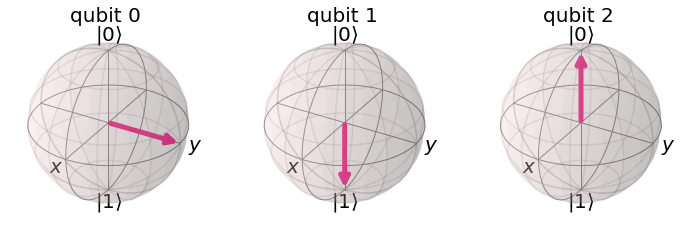

In [28]:
plot_bloch_multivector(qc)

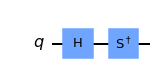

In [34]:
qc2 = QuantumCircuit(1)
qc2.h(0)
qc2.sdg(0)
qc2.draw()

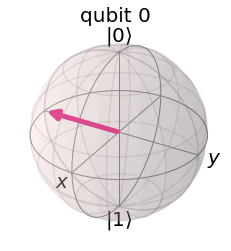

In [35]:
plot_bloch_multivector(qc2)

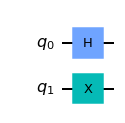

In [64]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

In [6]:
from qiskit.providers.aer import AerSimulator
from qiskit import execute, ClassicalRegister

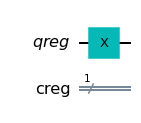

In [73]:
qc = QuantumCircuit()
cr = ClassicalRegister(1, 'creg')
qr = QuantumRegister(1, "qreg")
qc.add_register(cr)
qc.add_register(qr)

qc.x(qr[0])
qc.draw()

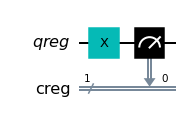

In [74]:
qc.measure(qr[0], cr[0])
qc.draw()

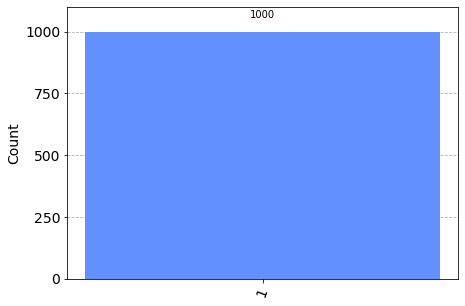

In [75]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

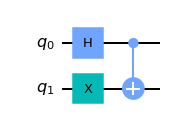

In [76]:
qc = QuantumCircuit(2)
qc.x(1)
qc.h(0)
qc.cnot(0,1)
qc.draw()

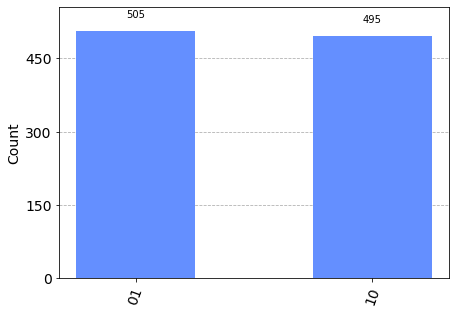

In [78]:
qc.measure_all()
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

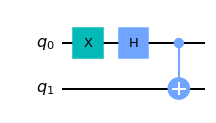

In [80]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cnot(0,1)
qc.draw()

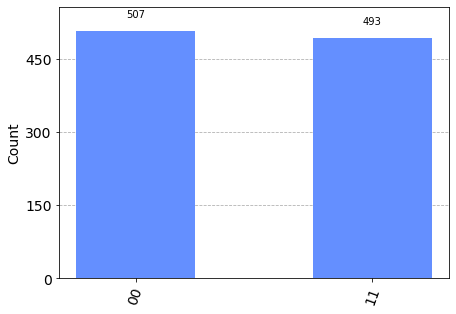

In [81]:
qc.measure_all()
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

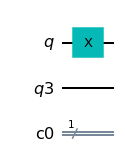

In [9]:
qc = QuantumCircuit(1)
qc.x(0)
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc.add_register(cr)
qc.add_register(qr)
qc.draw()


In [10]:
qc.measure(qr[0], cr[0])

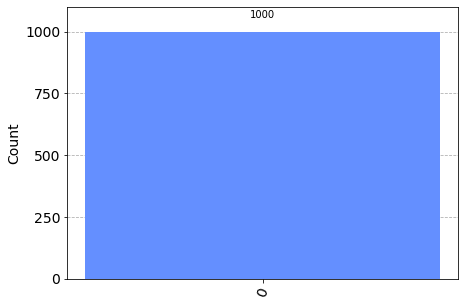

In [11]:
# qc.measure_all()
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

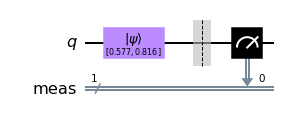

In [12]:
qc = QuantumCircuit(1)
# qc.initialize([np.sqrt(3)/2, 1/2], 0)
qc.initialize([1/np.sqrt(3), np.sqrt(2/3)], 0)

qc.measure_all()
qc.draw()

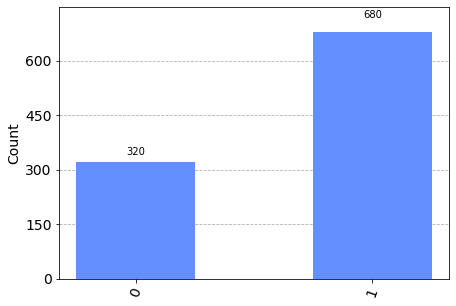

In [13]:
counts = execute(qc, backend, shots=1000).result().get_counts()
plot_histogram(counts)

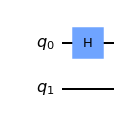

In [35]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw()

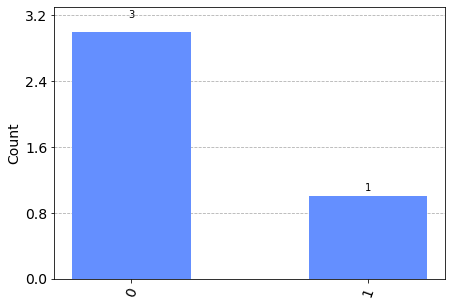

In [34]:
qc.measure_all()
counts = execute(qc, backend, shots=4).result().get_counts()
plot_histogram(counts)

/tmp/ipykernel_59/2311095969.py:12: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  or_circuit = or_circuit+oracle


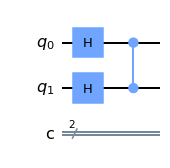

In [103]:
n = 2
or_circuit = QuantumCircuit(n,n)
# for i in range(n):
#     or_circuit.h(i)
or_circuit.h(0)
or_circuit.h(1)

oracle = QuantumCircuit(n, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
# or_circuit.append(oracle, [0,1])
or_circuit = or_circuit+oracle
or_circuit.draw()

In [49]:
job = execute(or_circuit, backend)
result = job.result()

In [104]:
backend= Aer.get_backend('statevector_simulator')
job= execute(or_circuit,backend)
result=job.result()
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

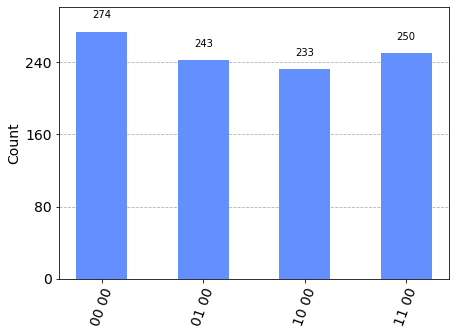

In [89]:
or_circuit.measure_all()
counts = execute(or_circuit, backend, shots=1000).result().get_counts()
plot_histogram(counts)

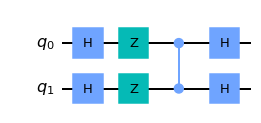

In [107]:
reflection = QuantumCircuit(2,name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw()

In [106]:
backend= Aer.get_backend('statevector_simulator')
job= execute(reflection,backend)
result=job.result()
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j, -0.5-0.j, -0.5-0.j, -0.5-0.j])

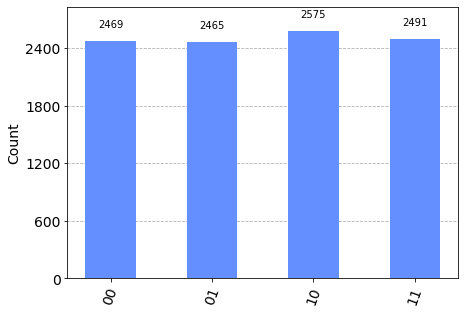

In [95]:
reflection.measure_all()
counts = execute(reflection, backend, shots=10000).result().get_counts()
plot_histogram(counts)

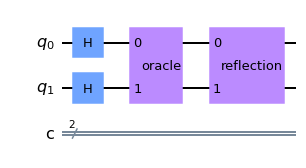

In [67]:
or_circuit.append(reflection, [0,1])
or_circuit.draw()

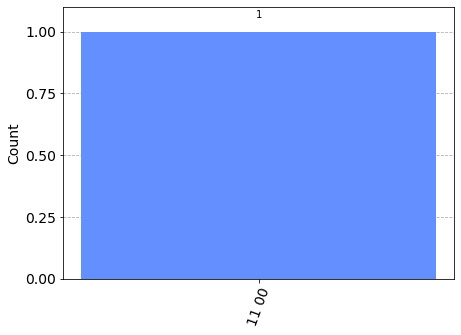

In [62]:
or_circuit.measure_all()
counts = execute(or_circuit, backend, shots=1).result().get_counts()
plot_histogram(counts)